<a href="https://colab.research.google.com/github/artemkonkin/DotNetArch/blob/master/%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Введение




Есть три сходных между собой понятия: интерполяция, аппроксимация и регрессия. У них общая цель: из семейства функций выбрать ту, которая обладает определенным свойством.

Интерполяция — способ выбрать из семейства функций ту, которая проходит через заданные точки. Часто функцию затем используют для вычисления в промежуточных точках. Примеры: интерполяция полиномами Лагранжа, сплайн-интерполяция, многомерная интерполяция (билинейная, трилинейная, методом ближайшего соседа и т.д). Есть также родственное понятие экстраполяции — предсказание поведения функции вне интервала.

Аппроксимация — способ выбрать из семейства «простых» функций приближение для «сложной» функции на отрезке, при этом ошибка не должна превышать определенного предела. Аппроксимацию используют, когда нужно получить функцию, похожую на данную, но более удобную для вычислений и манипуляций (дифференцирования, интегрирования и т.п). При оптимизации критических участков кода часто используют аппроксимацию: если значение функции вычисляется много раз в секунду и не нужна абсолютная точность, то можно обойтись более простым аппроксимантом с меньшей «ценой» вычисления. Примеры: ряд Тейлора на отрезке, аппроксимация ортогональными многочленами, аппроксимация Паде, аппроксимация синуса Бхаскара и т.п.

Регрессия — способ выбрать из семейства функций ту, которая минимизирует функцию потерь. Последняя характеризует насколько сильно пробная функция отклоняется от значений в заданных точках. Если точки получены в эксперименте, они неизбежно содержат ошибку измерений, шум, поэтому разумнее требовать, чтобы функция передавала общую тенденцию, а не точно проходила через все точки. В каком-то смысле регрессия — это «интерполирующая аппроксимация»: мы хотим провести кривую как можно ближе к точкам и при этом сохранить ее максимально простой чтобы уловить общую тенденцию. За баланс между этими противоречивыми желаниями как-раз отвечает функция потерь ( «loss function» или «cost function»)



Линейные регрессионные модели - предполагают, что определяемый критерий линейно
зависит от признаков описывающих объект или процесс.

Впервые метод опубликовал Лежандр в 1805 году, хотя Гаусс пришел к нему раньше и успешно использовал для предсказания орбиты «кометы» (на самом деле карликовой планеты) Цереры. Существует множество вариантов и обобщений линейной регрессии: LAD, метод наименьших квадратов, Ridge регрессия, Lasso регрессия, ElasticNet и многие другие. https://scikit-learn.ru/1-1-linear-models/

В простом случае мы имеем известное  со школы линейное уравнение, где зависимая пременная  определяется независимой переменной

Достоинства:
1. Скорость и простота получения модели.
2. Интерпретируемость модели. Линейная модель является прозрачной и понятной . По полученным коэффициентам регрессии можно судить о том, как тот или иной фактор влияет на результат, сделать на этой основе дополнительные полезные выводы.
3. Широкая применимость. Большое количество реальных процессов в спорте,экономике и конечно в компьютерных играх можно с достаточной точностью описать линейными моделями.
4. Изученность данного подхода. Для линейной регрессии известны типичные проблемы (например, мультиколлинеарность) и их решения, разработаны и реализованы тесты оценки статической
значимости получаемых моделей.


Недостатки:
1. Не могут выявлять сложные зависимости в данных.
2. Проблемы с мультиколлинеарностью

In [1]:
data = {
    'Защита': [8, 9, 16, 15, 15, 17, 16, 18],
    'Атака': [20, 20, 25, 40, 35, 30, 29, 27],
    'Побед': [250, 300, 500, 600, 630, 620, 480, 550]
}
df = pd.DataFrame(data)
df

NameError: name 'pd' is not defined

Линейная регрессия

- Показывает линейную модель и прогноз, прогнозируя Y используя X.

- Использует величину достоверности аппроксимации для измерения процента вариации, которая объясняется моделью.

-  X и Y не  взаимозаменяемые значения (поскольку Y предсказывается из X).

Используем билиотеку scikit-learn для построения линейной регрессионной модели. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Разделим наши данные на зависимую и независимые переменные. Обучим нашу модель на имеющихся данных

In [2]:
from sklearn.linear_model import LinearRegression

X, y = df[['Защита', 'Атака']], df['Побед']

lr = LinearRegression(fit_intercept= False)

lr.fit(X,y)

pd.DataFrame({"Коэфф-ты уравнения":lr.coef_}, index=['Защита', 'Атака'])

NameError: name 'df' is not defined



Таким образом возможно проследить связь между отдельными переменными и более обоснованно подходить к вопросам планирования тактики соревновательной деятельности.

In [ ]:
print("Коэфф-т детерминации - ", lr.score(X,y))

Коэфф-т детерминации -  0.8937631373055038


Для проверки модели проведём ещё одни замеры на которых она не обучалась и, результаты которых ей надо будет предсказать.

In [ ]:
new_data = {
    'Защита': [17, 16],
    'Атака': [30, 29]
}

test_res =  [560, 520]


In [ ]:
x_res = lr.predict(pd.DataFrame(new_data))
x_res

array([562.85873403, 535.87837502])

коэффициент детерминации R² может быть определён разными способами

In [ ]:
print("Коэфф-т детерминации - ", lr.score(pd.DataFrame(new_data),test_res))

Коэфф-т детерминации -  0.6746310581686499


In [ ]:
from sklearn.metrics import r2_score

r2_score(test_res, x_res)

0.6746310581686499

Определим погрешность допущенную при применении нашей модели по методу наименьших квадратов (MSE). https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

Root Mean Squared Deviation RMSD напрямую связана с MSE — значение этой меры равно корню квадратному из значения MSE для заданных наборов/
RMSD получается установкой значения гиперпараметра squared=False.

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test_res, x_res), mean_squared_error(test_res, x_res, squared=False)

(130.14757673254002, 11.408224083201558)

При наличии "выбросов" иногда лучше использовать оценку Mean Absolute Error MAE (Средняя Абсолютная Ошибка) — меру схожести предсказаний и правильных значений для каких-либо наблюдений по модулю разности. Метрики и оценки: количественная оценка качества прогнозов https://scikit-learn.ru/3-3-metrics-and-scoring-quantifying-the-quality-of-predictions/

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error

rmse = mean_squared_error(test_res, x_res,squared=False)
r2 = r2_score(test_res, x_res)
print('RMSE:', rmse)
print('R2:', r2)
print("MAE: ", mean_absolute_error(test_res, x_res))

NameError: name 'mean_squared_error' is not defined

Иногда бывает полезно усложнить модель, учитывая нелинейные особенности входных данных. Простой и распространенный метод использования — это полиномиальные функции, которые могут получить термины высокого порядка и взаимодействия функций. Реализован в PolynomialFeatures

In [4]:
from sklearn.preprocessing import PolynomialFeatures
x, y = df[['Защита', 'Атака']], df['Побед']

# sklearn генерирует допольнительное кол-во признаков для полиномиальной регресии
polynomial_features = PolynomialFeatures(degree=2) # указываем вторую степень полинома
x_poly = polynomial_features.fit_transform(x) # получаем новые признаки

model = LinearRegression(fit_intercept= False)
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
plt.figure(figsize=(7,6))

rmse = np.sqrt(mean_squared_error(y, y_poly_pred))
r2 = r2_score(y, y_poly_pred)
print('MSE:', rmse)
print('R2:', r2)
plt.scatter(df['Побед'].index, df['Побед'])

plt.plot(df['Побед'].index, y_poly_pred, color='r')
plt.show()

NameError: name 'df' is not defined

In [ ]:
x_res = model.predict(polynomial_features.fit_transform(pd.DataFrame(new_data)))
x_res, r2_score(test_res, x_res)

(array([592.56659195, 552.61404731]), -1.6553237413861677)

In [ ]:
pd.DataFrame({"перем-я":PolynomialFeatures(degree=2).fit(x).get_feature_names_out(x.columns),
              "коэф-т":model.coef_})

,перем-я,коэф-т
0,1,98.138805
1,Защита,3.276951
2,Атака,0.649696
3,Защита^2,-1.733846
4,Защита Атака,2.618941
5,Атака^2,-0.461500


Однако погоня за максимально точным описанием данных часто приводит к переобучению модели.

Используем для регрессии полином третьей степени.

In [5]:
polynomial_features = PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
plt.figure(figsize=(12,9))

rmse = np.sqrt(mean_squared_error(y, y_poly_pred))
r2 = r2_score(y, y_poly_pred)
print('MSE:', rmse)
print('R2:', r2)
plt.scatter(df['Побед'].index, df['Побед'])

plt.plot(df['Побед'].index, y_poly_pred, color='r')
plt.show()

NameError: name 'x' is not defined

In [ ]:
pd.DataFrame({"перем-я":PolynomialFeatures(degree=3).fit(x).get_feature_names_out(x.columns),
              "коэф-т":model.coef_})

,перем-я,коэф-т
0,1,6.772858e-11
1,Защита,-1.143446e+00
2,Атака,-1.370990e+00
3,Защита^2,7.685816e+01
4,Защита Атака,-7.418706e+01
5,Атака^2,8.308342e+00
6,Защита^3,2.744770e-01
7,Защита^2 Атака,-3.677943e+00
8,Защита Атака^2,3.548087e+00
9,Атака^3,-6.340852e-01


# Реальные данные

In [6]:
lol = pd.read_csv('https://raw.githubusercontent.com/vn322/Sport-University/main/esport/high_diamond_ranked_10min.csv')
lol.head(3)

NameError: name 'pd' is not defined

In [ ]:
X=lol[['blueDeaths','blueWardsPlaced', 'blueWardsDestroyed',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAssists','blueTotalMinionsKilled']]
y=lol['blueKills']

In [ ]:
X.iloc[[2]]

,blueDeaths,blueWardsPlaced,blueWardsDestroyed,blueTowersDestroyed,blueTotalGold,blueAssists,blueTotalMinionsKilled
2,11,15,0,0,16113,4,186


In [ ]:
y.iloc[[2]]

2    7
Name: blueKills, dtype: int64

<AxesSubplot:>

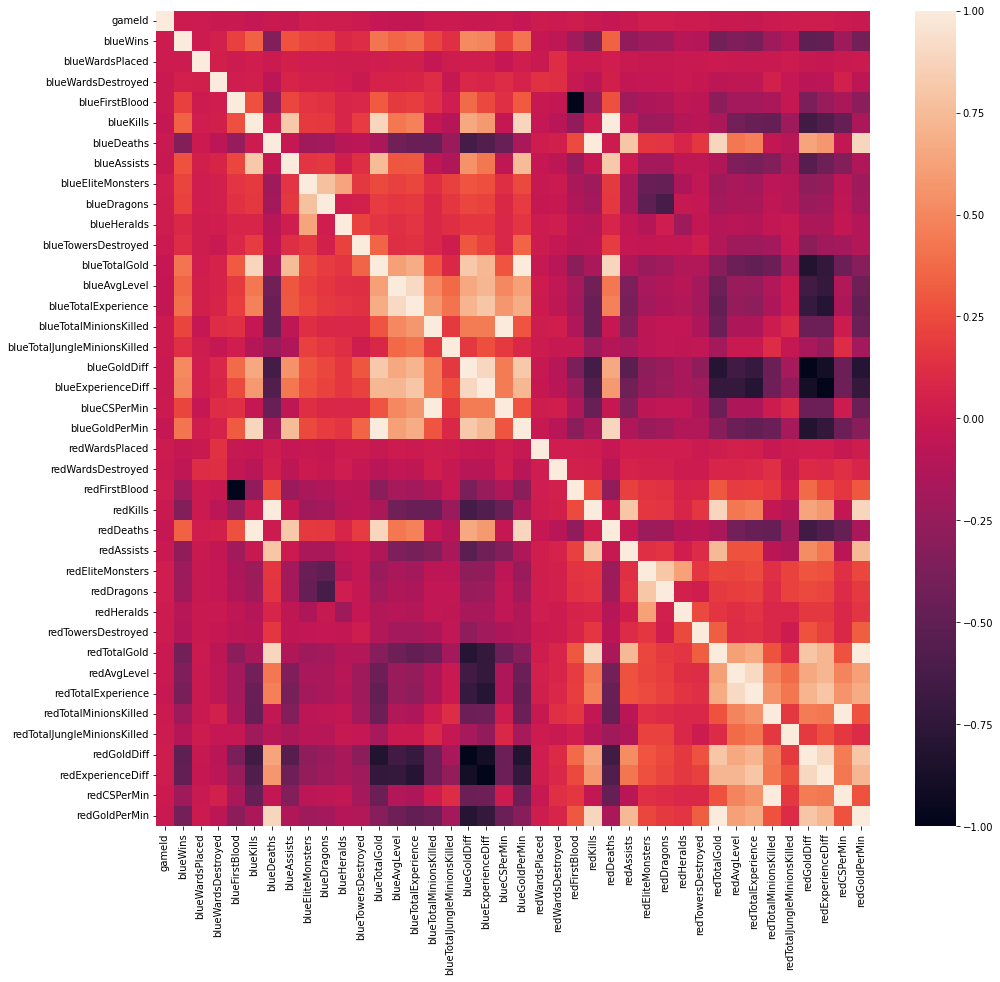

In [ ]:
plt.figure(figsize = (16,15))
sns.heatmap(lol.corr(), annot=False)

In [7]:
sns.pairplot(lol, x_vars=['blueDeaths','blueWardsPlaced', 'blueWardsDestroyed',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAssists','blueTotalMinionsKilled'], y_vars='blueKills', height=9, aspect=0.7)

NameError: name 'sns' is not defined

In [ ]:
df_lol = lol[['blueKills','blueDeaths','blueWardsPlaced', 'blueWardsDestroyed',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAssists','blueTotalMinionsKilled']]
df_lol.corr()

,blueKills,blueDeaths,blueWardsPlaced,blueWardsDestroyed,blueTowersDestroyed,blueTotalGold,blueAssists,blueTotalMinionsKilled
blueKills,1.000000,0.004044,0.018138,0.033748,0.180314,0.888751,0.813667,-0.030880
blueDeaths,0.004044,1.000000,-0.002612,-0.073182,-0.071441,-0.162572,-0.026372,-0.468560
blueWardsPlaced,0.018138,-0.002612,1.000000,0.034447,0.009462,0.019725,0.033217,-0.033925
blueWardsDestroyed,0.033748,-0.073182,0.034447,1.000000,-0.009150,0.060054,0.067793,0.111028
blueTowersDestroyed,0.180314,-0.071441,0.009462,-0.009150,1.000000,0.350941,0.123663,0.092291
blueTotalGold,0.888751,-0.162572,0.019725,0.060054,0.350941,1.000000,0.748352,0.284902
blueAssists,0.813667,-0.026372,0.033217,0.067793,0.123663,0.748352,1.000000,-0.062035
blueTotalMinionsKilled,-0.030880,-0.468560,-0.033925,0.111028,0.092291,0.284902,-0.062035,1.000000


<AxesSubplot:>

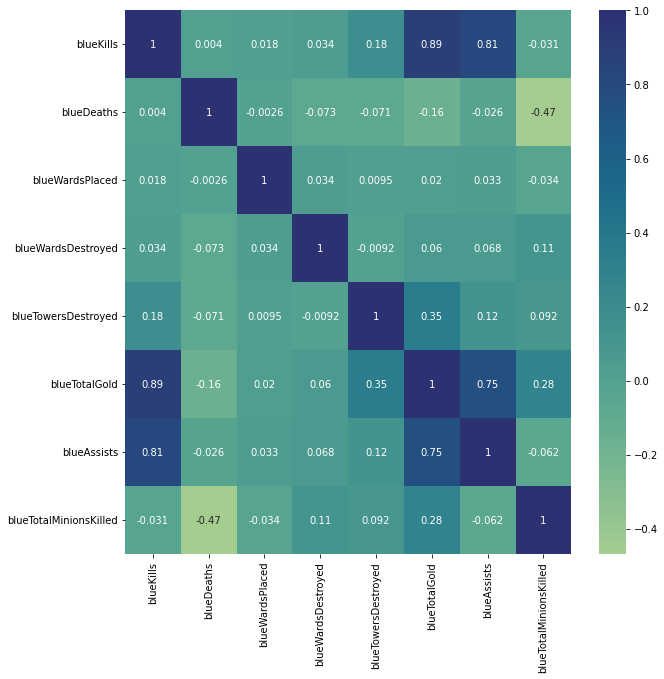

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(df_lol.corr(), annot=True, cmap="crest")

## Линейная регрессия МНК

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Допустим имеем набор из $M$ пар исходных данных $(Xi, Yi)$, где

$ℝ$ — множество вещественных чисел

$ℕ$ — множество натуральных чисел

$M Є ℕ$, $i Є ℕ$, $1 ≤ i ≤ M$

$X_i Є ℝd, d Є ℕ$, т.е. каждый $X_i$ — это последовательность вещественных чисел длиной $d$
$Y_i Є ℝk, k Є ℕ$, т.е. и каждый $Y_i$ — тоже последовательность вещественных чисел, но длиной $k$.

$Х$ называют независимой переменной или  факторами, или регрессорами. А $Y$ называют зависимой или объясняемой переменной.

В  простом случае $d = k = 1$, то есть нам заданы пары чисел, например, (сила, количество побед).
Чаще всего $d > 1$, а $k = 1$, то есть для каждого Y даны несколько Х, например, ((сила, быстрота, ловкость, выносливость), количество побед).
$$w =\begin{pmatrix}
  сила, быстрота, ловкость, выносливость
\end{pmatrix} w^{T} = \begin{pmatrix}
  сила\\
 быстрота\\
  ловкость\\
  выносливость
\end{pmatrix} $$

 $Y$ тоже состоит из нескольких значений и тогда пары $(Xi, Yi)$ могут выглядеть, например, вот так — ((сила, быстрота, ловкость, выносливость), (количество побед, количество убитых монстров)).

И, как вы уже возможно догадались, мы вдруг делаем неожиданное предположение: наши Y не просто зависят, а линейно зависят от $Х$, то есть $Y = w^TX$, где $w$ — это параметры модели в виде вещественной матрицы размерности $d$ x $k$.

Однако, не обязательно чтобы $w^TX$  равнялось именно $Y$. Исходные данные как правило имеют с погрешность. Кроме того, велика вероятность, что не все значимые факторы $X$  на $Y$ были измерены и занесены в набор данных. Поэтому  надо учесть случайную ошибку.
Также не обязательно, что $Y$ линейно зависит  от $X$. Ведь возможно они зависят от чего-то другого, что в свою очередь зависит от $Х$. Например возможны более сложные, нелинейные зависимости. $Y$ может быть равен $w*X^2$ или $w*log X$. Посмотрев немного шире, можем предположить, что возможна и обратная ситуация $log Y = w^TX$.

Таким образом мы приходим к обобщенной постановке линейной задачи:
$$Y^* = w^TX^* + ℇ$$
где

$X^* = f(X)$,

$Y^* = g(Y)$,

$ℇ$ — случайная величина.

Несмотря на то, что $f$ и g могут быть нелинейными функциями, и $Y$ в результате может весьма нелинейно зависеть от $Х$, модель все равно остается линейной относительно параметров $w$. Именно поэтому она и называется линейной моделью.

Типичными примерами простых функционалов являются:

- наименьшие квадраты: $min ∑ (Y_i^* — w^TX_i^*)^2$
- взвешенные наименьшие квадраты: $min ∑ Wi (Y_i^* — w^TX_i^*)^2$, так возможно более новым данным придать больший вес, и тем самым понизить значимость данных собранных в прошлом.
- обобщенные наименьшие квадраты по расстоянию Махаланобиса: $min ∑ (Y_i^* — w^TX_i^*)^T Ω-1 (Y_i^* — w^TX_i^*)$
- функция Хубера, которая интересна тем, что рядом с минимумом она ведет себя квадратичным образом, а в остальных местах линейно.
- обратная функция Хубера, которая, наоборот, везде квадратична, а в окрестности минимума линейна.


Вариантов используемых функционалов  больше и можно побобрать оптимальный под решаемую задачу и имеющийся набор данных.


In [12]:
#разделим данные на обучающие и тестовые данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#обучаем модель
regressor = LinearRegression()
regressor.fit(X_train, y_train)

NameError: name 'X' is not defined

In [ ]:
#приведем получившиеся коэфициенты моделей
print(regressor.intercept_)
print(regressor.coef_)

coef_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coef_df

-16.293767453196153
[ 2.72083650e-02 -1.69007541e-03  1.29886680e-03 -1.58584908e+00
  1.79945164e-03  9.44885490e-02 -3.64339935e-02]


,Coefficient
blueDeaths,0.027208
blueWardsPlaced,-0.001690
blueWardsDestroyed,0.001299
blueTowersDestroyed,-1.585849
blueTotalGold,0.001799
blueAssists,0.094489
blueTotalMinionsKilled,-0.036434


In [ ]:
#Построим прогнозы
#Для этого используем наши тестовые данные и посмотрим насколько точно наш алгоритм предсказывает процентную оценку
y_pred = regressor.predict(X_test)
#сравним фактические значения с предсказанными
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
3535,5,4.324808
7150,7,5.644291
9578,6,6.141153
6882,3,2.269931
3766,5,4.979288
...,...,...
4513,6,4.672379
3761,7,7.277432
5632,5,3.652158
4311,15,14.737563


Следует помнить, что метод наименьших квадратов максимально хорошо будет работать с нормально распределёнными данными и возможны достаточно большие  ошибки в противном случае.

In [ ]:
rmse = mean_squared_error(y_test, y_pred,squared=False)
r2 = r2_score(y_test, y_pred)
print('RMSE:', rmse)
print("MAE: ", mean_absolute_error(y_test, y_pred))
print('R2:', r2)


RMSE: 0.9337893325655982
MAE:  0.7223770647187471
R2: 0.9026037966873048


Одной из проблем, которая часто возникает на практике с  линейной регрессией, является мультиколлинеарность , когда две или более переменных-предикторов сильно коррелируют друг с другом, так что они не предоставляют уникальную или независимую информацию в регрессионной модели.

Это может привести к тому, что оценки коэффициентов модели будут ненадежными и будут иметь высокую дисперсию. То есть, когда модель применяется к новому набору данных, которого она раньше не видела, она, скорее всего, будет работать плохо.

# Регуляризация

Регуляризация  обычно представлена в виде дополнительного регуляризационного слагаемого.
Регуляризация предназначена для регулирования сложности модели и ее целью является упрощение модели. Это, в частности, помогает бороться с переобучением и позволяет увеличить обобщающую способность модели.

Типичные примеры регуляризационных функций:
1. $$L1 = ∑ |w|$$
Известная как LASSO-регуляризация (Least Absolute Shrinkage and Selection Operator), и, как несложно догадаться из названия, она позволяет снижать размерность коэффициентов, обращая некоторые из них в нули. И это весьма удобно, когда исходные данные сильно коррелированы.

2. $$L2 = ∑ |w|^2$$
Иногда ее называют ridge-регуляризацией, и она позволяет минимизировать значения коэффициентов модели, а заодно сделать ее робастной к незначительным изменениям исходных данных. А еще она хорошо дифференцируется, а значит модель можно рассчитать аналитически.

3. $$LEN = α L1 + (1 — α) L2$$
Совмещая LASSO и ridge, получаем ElasticNet, которая объединяет два мира со всеми их плюсами и минусами.

4. $$LN = ∑ E [A(w, Ž)] — A(w,X)$$ где А — log partition функция
Введя новую переменную вида $Ž = X + ℥$, где $℥$ — случайная величина, мы фактически добавляем в исходные данные случайный шум, что очевидным образом помогает бороться с переобучением.
Для самой простой линейной регрессии введение аддитивного шума идентично L2-регуляризации, но для других моделей аддитивный шум может давать очень интересный результат. Например, в логистической регресии он по сути штрафует за предсказания близкие к 1/2 (проще говоря, поощряет категоричность предсказаний и наказывает за неопределенность).

5. Dropout
Еще один хитрый подход, активно применяемый в нейронных сетях. Введем новую переменную вида $Ž = X * ℥$, где $℥$ — вектор Бернуллевских случайных величин длиной d. Проще говоря, мы случайным образом выбираем некоторое подмножество факторов Х и строим модель по ним, а потом выбираем такую модель, которая меньше всех зависит от этой случайности.
Для самой простой линейной регрессии dropout снова аналогичен L2-регуляризации. А вот, например, в логистической регрессии он позволяет учитывает влияние редких, но весьма характерных факторов (проще говоря, для некоторых очень маленьких Xij он будет подбирать большие коэффициенты bj, тем самым повышая их влияние на результат.

Этим, конечно, доступные виды регуляризации не ограничиваются. Хотя для линейных моделей редко требуется что-то большее.

## Lasso regression

Lasso regression — это метод, который оценивает разреженные коэффициенты. Это полезно в некоторых контекстах из-за его тенденции отдавать предпочтение решениям с меньшим количеством ненулевых коэффициентов, эффективно уменьшая количество функций, от которых зависит данное решение.
$$\min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha ||w||_1}$$

In [ ]:
from sklearn.linear_model import Lasso, Ridge

#  модель с L1-регуляризацией
x_lasso = Lasso(alpha=0.1).fit(X_train, y_train)
pd.DataFrame(x_lasso.coef_, X.columns, columns=['Coefficient'])

,Coefficient
blueDeaths,0.018391
blueWardsPlaced,-0.001336
blueWardsDestroyed,0.000000
blueTowersDestroyed,-0.000000
blueTotalGold,0.001663
blueAssists,0.115362
blueTotalMinionsKilled,-0.035327


In [ ]:
y_pred = x_lasso.predict(X_test)
rmse = mean_squared_error(y_test, y_pred,squared=False)
r2 = r2_score(y_test, y_pred)
print('RMSE:', rmse)
print("MAE: ", mean_absolute_error(y_test, y_pred))
print('R2:', r2)

RMSE: 1.0135818668481062
MAE:  0.7723202329595177
R2: 0.8852475740445266


## Ridge regression

Ridge regression метод настройки модели, который используется для анализа  данных, страдающих от мультиколлинеарности. Оценка смещена и имеет более низкую дисперсию, чем оценка МНК. Этот метод выполняет регуляризацию L2 и решает некоторые проблемы  методов наименьших квадратов, налагая следующий штраф на размер коэффициентов:

$$\min_{w} || X w - y||_2^2 + \alpha ||w||_2^2$$

In [ ]:
# модель с L2-регуляризацией
x_ridge = Ridge().fit(X_train, y_train)
pd.DataFrame(x_ridge.coef_, X.columns, columns=['Coefficient'])

,Coefficient
blueDeaths,0.027224
blueWardsPlaced,-0.001690
blueWardsDestroyed,0.001302
blueTowersDestroyed,-1.581747
blueTotalGold,0.001799
blueAssists,0.094584
blueTotalMinionsKilled,-0.036427


In [ ]:
y_pred = x_ridge.predict(X_test)
rmse = mean_squared_error(y_test, y_pred,squared=False)
r2 = r2_score(y_test, y_pred)
print('RMSE:', rmse)
print("MAE: ", mean_absolute_error(y_test, y_pred))
print('R2:', r2)

RMSE: 0.9338287175700666
MAE:  0.7224004581207424
R2: 0.90259558063543


# Задание
Провести исследование на собранном ранее наборе данных (он может быть дополнен или собран новый)

- определить цель исследования
- разделить набор данных на тренировочный и тестовый
- использовать на выбор любой метод линейной регрессии
- описать ход исследования дав пояснение и обоснование
- сделать выводы и определить практическое значение полученных знаний